<a href="https://colab.research.google.com/github/Farhan269/Drought-prediction/blob/main/Drought/drought.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving Ishwardi.csv to Ishwardi.csv


{'Ishwardi.csv': b'year,Month Order,Month,prcp(mm),Tmax(\xcb\x9aC),Tmin(\xcb\x9aC),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12\r\n1981,1,jan,30,23.57419359,11.69999996,222.8000004,70.4516129,2.313320516,87.01389,1.813573733,NaN,NaN,NaN\r\n1981,2,feb,81,26.44642857,13.55714287,228.6999981,68.08928571,1.513923429,102.43569,1.894641623,NaN,NaN,NaN\r\n1981,3,mar,64,30.21290312,17.38064517,252.8999996,64.53225806,2.331574839,144.99705,1.197579752,1.9027411,NaN,NaN\r\n1981,4,apr,360,31.4,21.2,254.3999996,71.5,3.0369108,149.17473,2.43119657,2.238628532,NaN,NaN\r\n1981,5,may,323,32.41935484,23.72258069,240.5000007,76.20967742,3.775325806,156.34953,1.785859165,2.256429267,NaN,NaN\r\n1981,6,jun,223,32.48333333,26.03666668,140.5000001,80.13333333,3.4433184,135.68414,0.02637155,2.288249656,2.406761962,NaN\r\n1981,7,jul,478,31.18709675,25.82580646,130.7999998,83.70967742,3.250928903,124.59253,1.455305069,1.904349682,2.486588541,NaN\r\n1981,8,aug,211,31.97419351,26.51612903

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df= pd.read_csv('Ishwardi.csv')

In [ ]:
df

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,NaN
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,NaN
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,NaN
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,NaN
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


In [ ]:
df.isnull().sum()


year                 0
Month Order          0
Month                0
prcp(mm)             0
Tmax(˚C)             0
Tmin(˚C)             0
SSH(hrs)             0
Humidity avg %       0
wind speed (m/s)     0
PET                  0
spei1                0
spei3                2
spei6                5
spei12              11
dtype: int64

Separate null value

In [ ]:
test_data=df[df["spei12"].isnull()]

In [ ]:
test_data

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,NaN
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,NaN
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,NaN
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,NaN
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,NaN
5,1981,6,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414,0.026372,2.288250,2.406762,NaN
6,1981,7,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253,1.455305,1.904350,2.486589,NaN
7,1981,8,aug,211,31.974194,26.516129,176.000000,81.096774,3.728860,122.56709,0.119539,0.984630,2.243884,NaN
8,1981,9,sep,423,31.763333,25.816667,165.599999,82.483333,3.009474,111.64418,1.231757,1.359016,2.185121,NaN
9,1981,10,oct,0,32.206451,22.409677,249.900000,70.564516,1.083643,123.79691,-1.931238,0.161909,1.418281,NaN


In [ ]:
dat = df.dropna()

In [ ]:
dat

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
11,1981,12,dec,48,24.787097,12.022581,231.000001,67.467742,1.782286,87.52109,1.819494,-1.256290,0.935759,2.179214
12,1982,1,jan,0,25.400000,10.983871,240.100000,65.677419,1.007307,97.37734,-1.346388,0.649493,0.290084,2.100614
13,1982,2,feb,8,26.707143,12.321429,228.500001,61.750000,2.048574,106.82316,-0.059377,0.924485,0.522470,2.065718
14,1982,3,mar,81,30.032258,16.990323,246.600000,62.903226,2.670110,145.17363,1.451458,0.889373,-0.331903,2.132655
15,1982,4,apr,133,34.830000,22.763333,249.800001,67.000000,3.606224,171.43721,1.046341,1.227840,1.444260,1.760776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


In [ ]:
dat.isnull().sum()

year                0
Month Order         0
Month               0
prcp(mm)            0
Tmax(˚C)            0
Tmin(˚C)            0
SSH(hrs)            0
Humidity avg %      0
wind speed (m/s)    0
PET                 0
spei1               0
spei3               0
spei6               0
spei12              0
dtype: int64

In [ ]:
dat.shape

(433, 14)

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
dat['Month']=ord_mon.fit_transform(dat[['Month']])

<ipython-input-13-a36d62a53582>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Month']=ord_mon.fit_transform(dat[['Month']])


In [ ]:
x=dat[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
y=dat['spei12']
lr=LinearRegression()
lr.fit(x,y)


LinearRegression()

In [ ]:
x_test = test_data[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
x_test

,year,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET
0,1981,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389
1,1981,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569
2,1981,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705
3,1981,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473
4,1981,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953
5,1981,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414
6,1981,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253
7,1981,aug,211,31.974194,26.516129,176.000000,81.096774,3.728860,122.56709
8,1981,sep,423,31.763333,25.816667,165.599999,82.483333,3.009474,111.64418
9,1981,oct,0,32.206451,22.409677,249.900000,70.564516,1.083643,123.79691


In [ ]:
x_test.shape

(11, 9)

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
x_test['Month']=ord_mon.fit_transform(x_test[['Month']])

<ipython-input-18-e3206a7399ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Month']=ord_mon.fit_transform(x_test[['Month']])


In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred

array([0.77463287, 1.08351318, 0.72237126, 1.14156441, 0.6087868 ,
       0.18573105, 0.91423905, 0.16141234, 0.87002394, 0.80933688,
       0.5473786 ])

In [ ]:
test_data.loc[test_data.spei12.isnull(),'spei12'] = y_pred

<ipython-input-21-6bcee27984da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[test_data.spei12.isnull(),'spei12'] = y_pred


In [ ]:
test_data

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,0.608787
5,1981,6,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414,0.026372,2.288250,2.406762,0.185731
6,1981,7,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253,1.455305,1.904350,2.486589,0.914239
7,1981,8,aug,211,31.974194,26.516129,176.000000,81.096774,3.728860,122.56709,0.119539,0.984630,2.243884,0.161412
8,1981,9,sep,423,31.763333,25.816667,165.599999,82.483333,3.009474,111.64418,1.231757,1.359016,2.185121,0.870024
9,1981,10,oct,0,32.206451,22.409677,249.900000,70.564516,1.083643,123.79691,-1.931238,0.161909,1.418281,0.809337


In [ ]:
df.loc[df.spei12.isnull(),'spei12'] = y_pred

In [ ]:
df

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,0.608787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


For spei6

In [ ]:
test_data=df[df["spei6"].isnull()]

In [ ]:
test_data

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,NaN,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,NaN,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,NaN,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,NaN,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,NaN,0.608787


In [ ]:
dat = df.dropna()
dat

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
5,1981,6,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414,0.026372,2.288250,2.406762,0.185731
6,1981,7,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253,1.455305,1.904350,2.486589,0.914239
7,1981,8,aug,211,31.974194,26.516129,176.000000,81.096774,3.728860,122.56709,0.119539,0.984630,2.243884,0.161412
8,1981,9,sep,423,31.763333,25.816667,165.599999,82.483333,3.009474,111.64418,1.231757,1.359016,2.185121,0.870024
9,1981,10,oct,0,32.206451,22.409677,249.900000,70.564516,1.083643,123.79691,-1.931238,0.161909,1.418281,0.809337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


In [ ]:
dat.isnull().sum()

year                0
Month Order         0
Month               0
prcp(mm)            0
Tmax(˚C)            0
Tmin(˚C)            0
SSH(hrs)            0
Humidity avg %      0
wind speed (m/s)    0
PET                 0
spei1               0
spei3               0
spei6               0
spei12              0
dtype: int64

In [ ]:
dat.shape

(439, 14)

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
dat['Month']=ord_mon.fit_transform(dat[['Month']])

<ipython-input-30-a36d62a53582>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Month']=ord_mon.fit_transform(dat[['Month']])


In [ ]:
x=dat[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
y=dat['spei6']
lr=LinearRegression()
lr.fit(x,y)


LinearRegression()

In [ ]:



x_test = test_data[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
x_test

,year,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET
0,1981,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389
1,1981,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569
2,1981,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705
3,1981,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473
4,1981,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953


In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
x_test['Month']=ord_mon.fit_transform(x_test[['Month']])

<ipython-input-33-e3206a7399ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Month']=ord_mon.fit_transform(x_test[['Month']])


In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([0.73433602, 0.87501459, 0.52255415, 1.34227872, 0.8434945 ])

In [ ]:
df.loc[df.spei6.isnull(),'spei6'] = y_pred
df

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,0.734336,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,0.875015,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,0.522554,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,1.342279,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,0.843495,0.608787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


For spei3

In [ ]:
test_data=df[df["spei3"].isnull()]
test_data

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,NaN,0.734336,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,NaN,0.875015,1.083513


In [ ]:
dat = df.dropna()
dat

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,0.522554,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,1.342279,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,0.843495,0.608787
5,1981,6,jun,223,32.483333,26.036667,140.500000,80.133333,3.443318,135.68414,0.026372,2.288250,2.406762,0.185731
6,1981,7,jul,478,31.187097,25.825806,130.800000,83.709677,3.250929,124.59253,1.455305,1.904350,2.486589,0.914239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


In [ ]:
dat.isnull().sum()

year                0
Month Order         0
Month               0
prcp(mm)            0
Tmax(˚C)            0
Tmin(˚C)            0
SSH(hrs)            0
Humidity avg %      0
wind speed (m/s)    0
PET                 0
spei1               0
spei3               0
spei6               0
spei12              0
dtype: int64

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
dat['Month']=ord_mon.fit_transform(dat[['Month']])

<ipython-input-39-a36d62a53582>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Month']=ord_mon.fit_transform(dat[['Month']])


In [ ]:
x=dat[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
y=dat['spei3']
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [ ]:
x_test = test_data[['year', 'Month','prcp(mm)',	'Tmax(˚C)','Tmin(˚C)',	'SSH(hrs)',	'Humidity avg %',	'wind speed (m/s)',	'PET']]
x_test


,year,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET
0,1981,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389
1,1981,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569


In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
x_test['Month']=ord_mon.fit_transform(x_test[['Month']])

<ipython-input-42-e3206a7399ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['Month']=ord_mon.fit_transform(x_test[['Month']])


In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([0.90774864, 0.72796066])

In [ ]:
df.loc[df.spei3.isnull(),'spei3'] = y_pred
df

,year,Month Order,Month,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET,spei1,spei3,spei6,spei12
0,1981,1,jan,30,23.574194,11.700000,222.800000,70.451613,2.313321,87.01389,1.813574,0.907749,0.734336,0.774633
1,1981,2,feb,81,26.446429,13.557143,228.699998,68.089286,1.513923,102.43569,1.894642,0.727961,0.875015,1.083513
2,1981,3,mar,64,30.212903,17.380645,252.900000,64.532258,2.331575,144.99705,1.197580,1.902741,0.522554,0.722371
3,1981,4,apr,360,31.400000,21.200000,254.400000,71.500000,3.036911,149.17473,2.431197,2.238629,1.342279,1.141564
4,1981,5,may,323,32.419355,23.722581,240.500001,76.209677,3.775326,156.34953,1.785859,2.256429,0.843495,0.608787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,2017,8,aug,274,33.512903,26.829032,130.000000,82.258065,1.030539,138.30316,0.634500,0.680426,0.488297,0.354206
440,2017,9,sep,278,33.743333,26.536667,116.900000,81.533333,0.754512,126.46543,0.069114,0.817048,0.379295,0.032559
441,2017,10,oct,323,31.841935,24.538710,174.500000,81.467742,1.025561,108.97776,1.768311,1.312087,0.969036,0.964586
442,2017,11,nov,19,29.183333,17.946667,222.800000,72.266667,0.943140,99.43520,0.726297,1.348937,1.259411,1.030383


<Axes: xlabel='year'>

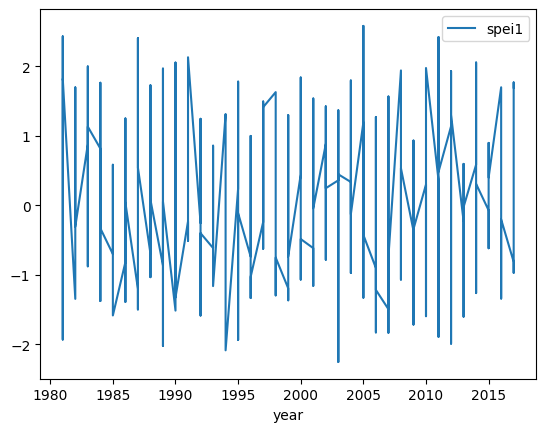

In [ ]:
df.plot( x = 'year', y = 'spei1')

<ipython-input-174-2027c78a47a7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


<Axes: >

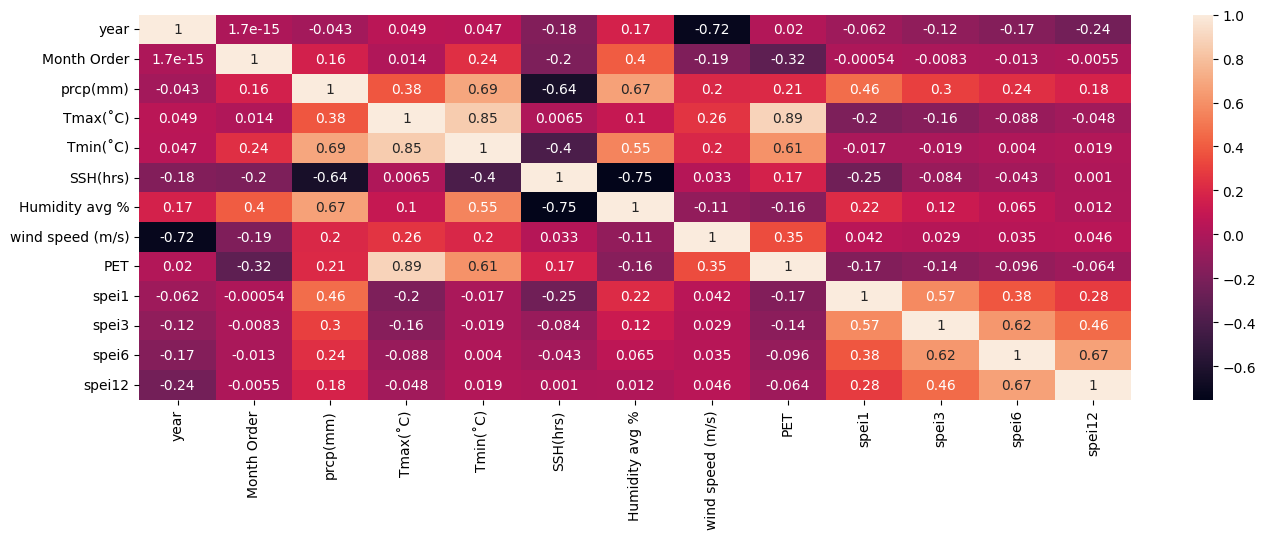

In [ ]:
corr_matrix=df.corr()
plt.figure(1, figsize=(16,5))
sns.heatmap(corr_matrix, annot=True)

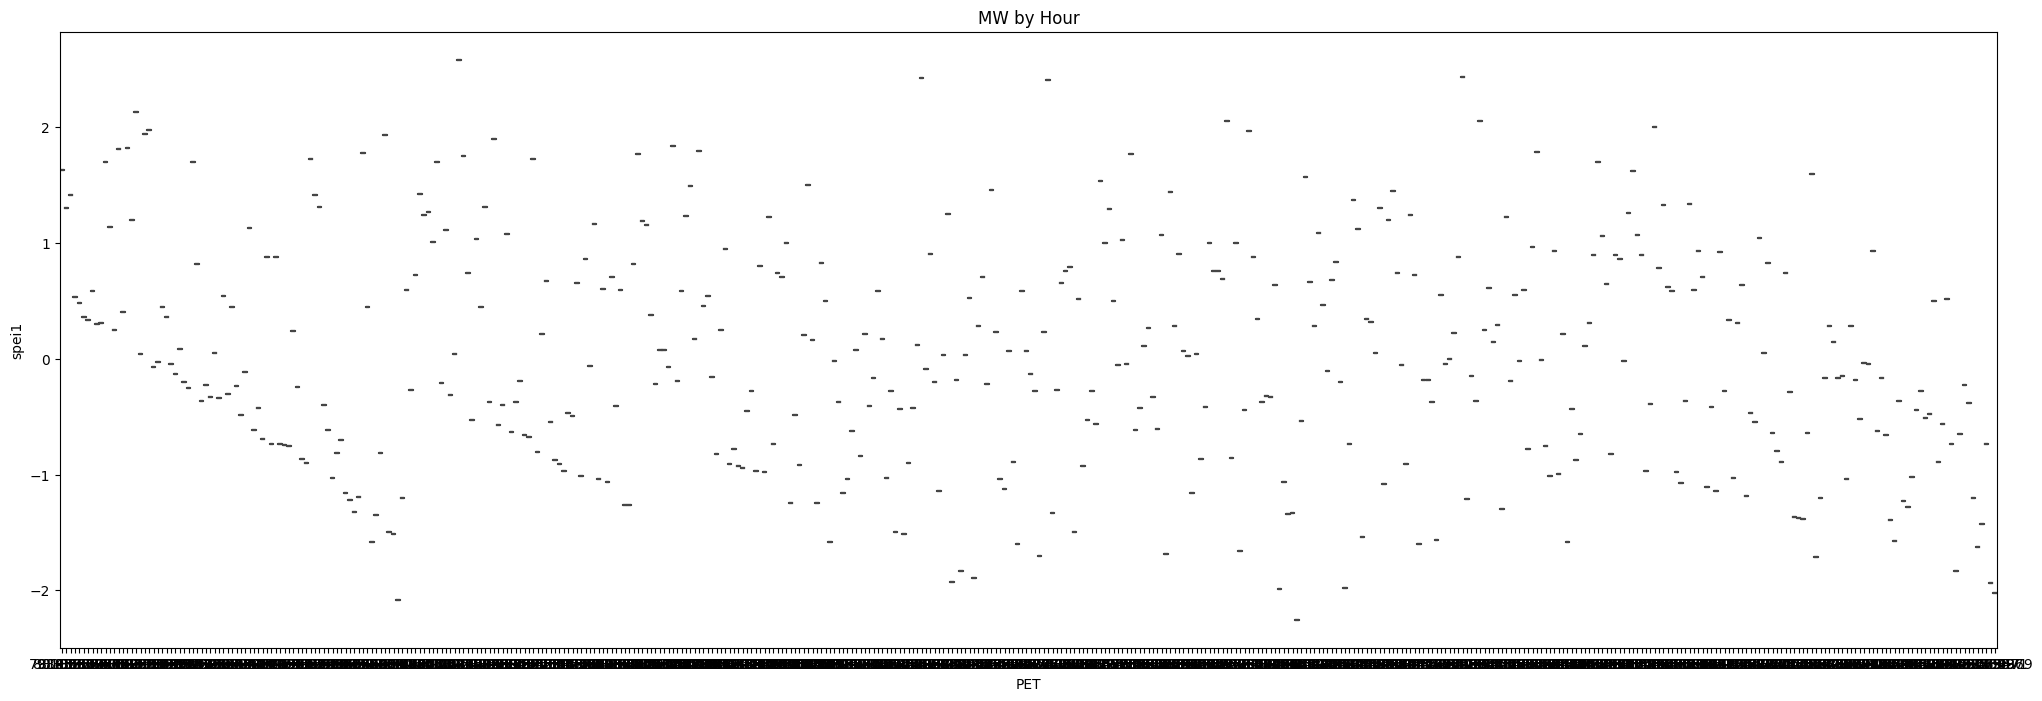

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(data=df, x='PET', y='spei1')
ax.set_title('MW by Hour')
plt.show()

For prediction SVM

In [ ]:
month_order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec']
ord_mon=OrdinalEncoder(categories=[month_order])
df['Month']=ord_mon.fit_transform(df[['Month']])

In [ ]:
x=df[['prcp(mm)', 'Tmax(˚C)', 'Tmin(˚C)','SSH(hrs)','Humidity avg %','wind speed (m/s)', 'PET']]
y=df['spei1']
Scaler=StandardScaler()
Scaled_x=Scaler.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=2)

In [ ]:
xtrain

,prcp(mm),Tmax(˚C),Tmin(˚C),SSH(hrs),Humidity avg %,wind speed (m/s),PET
329,206,32.886667,25.800000,132.900000,82.666667,1.505594,142.51181
381,157,31.848387,21.703226,246.400000,77.387097,0.761703,124.49237
371,0,24.190323,12.303226,131.500000,76.145161,1.098578,84.09075
364,155,34.116129,24.064516,216.700000,77.225806,1.209764,171.82275
428,381,33.183333,26.230000,160.800000,86.633333,0.900270,123.09989
...,...,...,...,...,...,...,...
299,1,26.490322,12.948387,250.299998,68.370968,1.247932,93.41996
22,67,28.616667,16.443333,216.600000,69.233333,2.208662,100.90701
72,2,25.329032,10.141935,254.300002,71.903226,2.062738,98.67974
15,133,34.830000,22.763333,249.800001,67.000000,3.606224,171.43721


In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVR(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([1.18155003e-02, 3.78611298e+00, 6.71520233e-03, 3.13431541e+01,
        6.36816025e-03, 3.78486853e+01]),
 'std_fit_time': array([6.35016352e-04, 1.15983657e+00, 6.85293645e-04, 5.21855948e+00,
        1.18151838e-04, 6.11493426e+00]),
 'mean_score_time': array([0.00574932, 0.00242577, 0.00268569, 0.00246372, 0.00269575,
        0.00249991]),
 'std_score_time': array([1.73827073e-03, 7.94101531e-05, 1.80560458e-04, 9.30202362e-05,
        2.23299761e-04, 1.04572857e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'li

In [ ]:
df_svm = pd.DataFrame(clf.cv_results_)
df_svm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011816,0.000635,0.005749,0.001738,1,rbf,"{'C': 1, 'kernel': 'rbf'}",-0.041510,0.003708,0.002227,0.020100,0.023509,0.001607,0.023176,6
1,3.786113,1.159837,0.002426,0.000079,1,linear,"{'C': 1, 'kernel': 'linear'}",0.215384,0.521058,0.382672,0.448573,0.244808,0.362499,0.117005,2
2,0.006715,0.000685,0.002686,0.000181,10,rbf,"{'C': 10, 'kernel': 'rbf'}",-0.017827,0.003134,0.000405,0.026847,0.028282,0.008168,0.017406,4
3,31.343154,5.218559,0.002464,0.000093,10,linear,"{'C': 10, 'kernel': 'linear'}",0.184945,0.533007,0.386076,0.468851,0.296887,0.373953,0.123381,1
4,0.006368,0.000118,0.002696,0.000223,20,rbf,"{'C': 20, 'kernel': 'rbf'}",-0.017827,0.003134,0.000405,0.026847,0.028282,0.008168,0.017406,4
5,37.848685,6.114934,0.002500,0.000105,20,linear,"{'C': 20, 'kernel': 'linear'}",0.010877,0.514382,0.401946,0.475597,0.294658,0.339492,0.180560,3


In [ ]:
df_svm[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.001607
1,1,linear,0.362499
2,10,rbf,0.008168
3,10,linear,0.373953
4,20,rbf,0.008168
5,20,linear,0.339492


In [ ]:
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [ ]:
clf.best_score_

0.37395327716539806

In [ ]:
model_svr = SVR(kernel='linear',C=1,gamma='auto')

In [ ]:
model_svr.fit(xtrain,ytrain)

SVR(C=1, gamma='auto', kernel='linear')

In [ ]:
model_svr.score(xtest,ytest)

0.4379924494097073

In [ ]:
pred_svm = model_svr.predict(xtest)

In [ ]:
mae = mean_absolute_error(ytest,pred_svm)
mse = mean_squared_error(ytest,pred_svm)
rmse = mean_squared_error(ytest,pred_svm, squared = False)
r2 = r2_score(ytest,pred_svm)


def calculate_nse(observed, predicted):
    obs_mean = np.mean(observed)
    ss_diff_obs_pred = np.sum((observed - predicted) ** 2)
    ss_diff_obs_mean = np.sum((observed - obs_mean) ** 2)
    nse = 1 - (ss_diff_obs_pred / ss_diff_obs_mean)
    return nse
nse= calculate_nse(ytest, pred_svm)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)

NSE coefficient: 0.4379924494097073
Mean Absolute Error: 0.5796014963043915
Mean Squared Error: 0.5258118762544685
r2 score: 0.4379924494097073
RMSE: 0.7251288687222902


In [ ]:
com = pd.concat([ytest, pd.Series(pred,index=xtest.index)],axis=1)

In [ ]:
com

,spei1,0
397,1.031675,0.210579
203,1.412818,0.346911
119,-1.326358,-0.012101
331,-0.048140,-0.074560
175,0.585287,0.134454
...,...,...
306,-0.540139,0.226223
215,-0.751858,0.196807
89,0.744681,0.580743
198,1.441525,1.792843


In [ ]:
com.reset_index(inplace=True)

In [ ]:
com

,index,spei1,0
0,397,1.031675,0.210579
1,203,1.412818,0.346911
2,119,-1.326358,-0.012101
3,331,-0.048140,-0.074560
4,175,0.585287,0.134454
...,...,...,...
84,306,-0.540139,0.226223
85,215,-0.751858,0.196807
86,89,0.744681,0.580743
87,198,1.441525,1.792843


In [ ]:
com.drop(["index"],axis = 1, inplace = True)

In [ ]:
com.columns = ["Actual", "Predicted"]

In [ ]:
com

,Actual,Predicted
0,1.031675,0.210579
1,1.412818,0.346911
2,-1.326358,-0.012101
3,-0.048140,-0.074560
4,0.585287,0.134454
...,...,...
84,-0.540139,0.226223
85,-0.751858,0.196807
86,0.744681,0.580743
87,1.441525,1.792843


<Axes: >

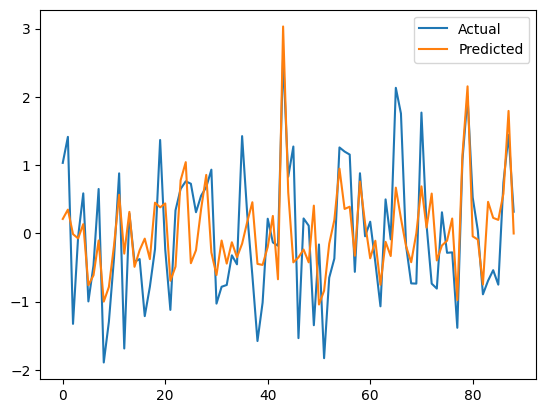

In [ ]:
com.plot()

RandomForest

In [ ]:
clf = GridSearchCV(RandomForestRegressor(), {
    'n_estimators': [100, 300, 500, 1000, 2000 , 4000],
    'max_depth': [1, 2, 5, 10,15, 20, 25],

}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([0.13812923, 0.33622046, 0.44940224, 0.89457331, 1.87787385,
        3.74927635, 0.09661913, 0.2893301 , 0.48154769, 1.01495128,
        1.99709826, 4.12961001, 0.1193893 , 0.3574461 , 0.69888654,
        1.16938119, 2.4677793 , 4.89386997, 0.14476995, 0.52420464,
        0.69031081, 1.48997841, 2.86694431, 5.78617296, 0.14307532,
        0.52713819, 0.69786577, 1.51043072, 2.96729665, 6.02463584,
        0.1840323 , 0.42600393, 0.70015683, 1.51823506, 2.93031344,
        5.94660845, 0.14409304, 0.43330798, 0.69886117, 1.51532879,
        2.92730222, 5.94604125]),
 'std_fit_time': array([0.00523384, 0.06259175, 0.00357754, 0.01488375, 0.22229902,
        0.26515728, 0.0023654 , 0.00572973, 0.0081954 , 0.10998299,
        0.13239217, 0.29640139, 0.00387125, 0.00551241, 0.10894012,
        0.00840092, 0.20926014, 0.19719532, 0.01239131, 0.08372945,
        0.00512701, 0.189878  , 0.20050787, 0.26184232, 0.00536717,
        0.08529059, 0.00762524, 0.17721073, 0.203

In [ ]:
df_rf = pd.DataFrame(clf.cv_results_)
df_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.138129,0.005234,0.005363,0.000071,1,100,"{'max_depth': 1, 'n_estimators': 100}",0.215387,0.277394,0.202006,0.149447,0.258479,0.220543,0.044935,42
1,0.336220,0.062592,0.013398,0.004209,1,300,"{'max_depth': 1, 'n_estimators': 300}",0.214781,0.276905,0.219498,0.148572,0.258682,0.223687,0.044263,37
2,0.449402,0.003578,0.012867,0.000301,1,500,"{'max_depth': 1, 'n_estimators': 500}",0.213970,0.275534,0.219211,0.148926,0.255676,0.222663,0.043382,39
3,0.894573,0.014884,0.025167,0.000939,1,1000,"{'max_depth': 1, 'n_estimators': 1000}",0.219144,0.277415,0.204286,0.148409,0.258762,0.221603,0.045076,40
4,1.877874,0.222299,0.046011,0.003156,1,2000,"{'max_depth': 1, 'n_estimators': 2000}",0.211737,0.279871,0.208450,0.147813,0.257584,0.221091,0.045615,41
5,3.749276,0.265157,0.091555,0.007987,1,4000,"{'max_depth': 1, 'n_estimators': 4000}",0.220203,0.277818,0.212010,0.147600,0.259328,0.223392,0.045028,38
6,0.096619,0.002365,0.004623,0.001313,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.389895,0.439696,0.499264,0.311880,0.477682,0.423683,0.067121,31
7,0.289330,0.005730,0.008484,0.000140,2,300,"{'max_depth': 2, 'n_estimators': 300}",0.380832,0.468186,0.478562,0.311477,0.478290,0.423469,0.066933,32
8,0.481548,0.008195,0.013506,0.000632,2,500,"{'max_depth': 2, 'n_estimators': 500}",0.354308,0.460276,0.489207,0.316085,0.472932,0.418561,0.069738,35
9,1.014951,0.109983,0.027701,0.004760,2,1000,"{'max_depth': 2, 'n_estimators': 1000}",0.368497,0.455372,0.482962,0.315916,0.467998,0.418149,0.064789,36


In [ ]:
df_rf[['param_max_depth','param_n_estimators','mean_test_score']]

,param_max_depth,param_n_estimators,mean_test_score
0,1,100,0.220543
1,1,300,0.223687
2,1,500,0.222663
3,1,1000,0.221603
4,1,2000,0.221091
5,1,4000,0.223392
6,2,100,0.423683
7,2,300,0.423469
8,2,500,0.418561
9,2,1000,0.418149


In [ ]:
clf.best_params_

{'max_depth': 15, 'n_estimators': 1000}

In [ ]:
clf.best_score_

0.837110239390326

In [ ]:
rf = RandomForestRegressor(
    max_depth = 5,
    n_estimators=2000,

)

In [ ]:
rf.fit(xtrain, ytrain)

RandomForestRegressor(max_depth=5, n_estimators=2000)

In [ ]:
rf.score(xtest,ytest)

0.8667587329846175

In [ ]:
pred_rf = rf.predict(xtest)

In [ ]:
mae = mean_absolute_error(ytest,pred_rf)
mse = mean_squared_error(ytest,pred_rf)
rmse = mean_squared_error(ytest,pred_rf, squared = False)
r2 = r2_score(ytest,pred_rf)


nse= calculate_nse(ytest, pred_rf)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)



NSE coefficient: 0.8667587329846175
Mean Absolute Error: 0.27591111775062294
Mean Squared Error: 0.12465996325190835
r2 score: 0.8667587329846175
RMSE: 0.35307217852998324


In [ ]:
com = pd.concat([ytest, pd.Series(pred_rf,index=xtest.index)],axis=1)

In [ ]:
com

,spei1,0
397,1.031675,1.257566
203,1.412818,1.182649
119,-1.326358,-1.030533
331,-0.048140,-0.124586
175,0.585287,0.126788
...,...,...
306,-0.540139,-0.021890
215,-0.751858,-0.788643
89,0.744681,0.731705
198,1.441525,1.410759


<Axes: >

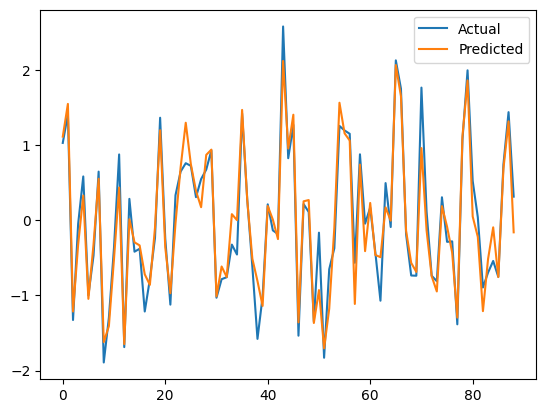

In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Predicted"]
com.plot()

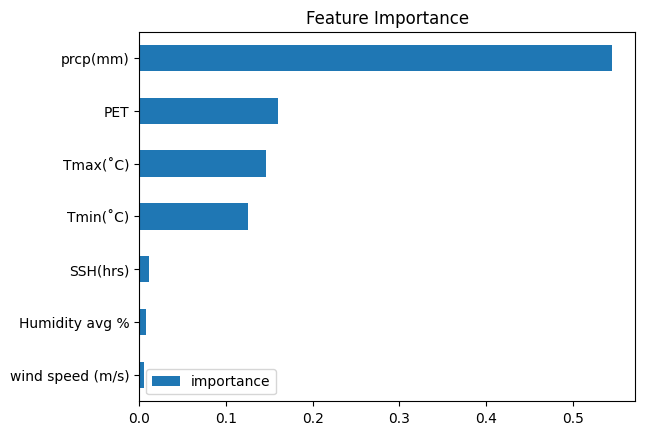

In [ ]:
fi = pd.DataFrame(data=rf.feature_importances_,
             index=rf.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

KNN

In [ ]:
clf = GridSearchCV(KNeighborsRegressor(), {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform','distance'],
    'leaf_size': [25,30,35,40]
}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([0.0022893 , 0.00167851, 0.00204053, 0.00147147, 0.00226426,
        0.00185084, 0.00216351, 0.00154276, 0.00197158, 0.00149341,
        0.00152168, 0.00147448, 0.0015511 , 0.00151954, 0.00149078,
        0.00158038, 0.00144033, 0.00144615, 0.00146594, 0.00142169,
        0.00148778, 0.00334501, 0.00155773, 0.00168505, 0.00229797,
        0.00209994, 0.00179973, 0.00184693, 0.00152893, 0.00148835,
        0.00204177, 0.00151558]),
 'std_fit_time': array([1.00304730e-03, 2.60764293e-04, 1.17179670e-03, 5.05774320e-05,
        8.16835553e-04, 4.35577629e-04, 5.77601662e-04, 8.52423478e-05,
        4.92313031e-04, 5.46146975e-05, 4.60602481e-05, 2.94446849e-05,
        1.52153455e-04, 3.35530762e-05, 1.86463450e-05, 2.30083866e-04,
        7.12293212e-06, 1.52971857e-05, 1.27714457e-04, 6.11765535e-06,
        2.47286849e-05, 3.24454389e-03, 4.66532465e-05, 3.62798399e-04,
        9.26155985e-04, 4.58679758e-04, 1.05353024e-04, 3.33571658e-04,
        4.48750130e-0

In [ ]:
df_knn = pd.DataFrame(clf.cv_results_)
df_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002289,0.001003,0.001869,0.000600,25,3,uniform,"{'leaf_size': 25, 'n_neighbors': 3, 'weights':...",0.745910,0.752794,0.689498,0.528994,0.708197,0.685079,0.081489,13
1,0.001679,0.000261,0.001819,0.000547,25,3,distance,"{'leaf_size': 25, 'n_neighbors': 3, 'weights':...",0.781579,0.790244,0.720755,0.538074,0.727386,0.711608,0.091133,1
2,0.002041,0.001172,0.001427,0.000036,25,5,uniform,"{'leaf_size': 25, 'n_neighbors': 5, 'weights':...",0.710174,0.699506,0.678043,0.554413,0.704005,0.669228,0.058418,17
3,0.001471,0.000051,0.001444,0.000021,25,5,distance,"{'leaf_size': 25, 'n_neighbors': 5, 'weights':...",0.755679,0.737415,0.711386,0.561687,0.733256,0.699885,0.070521,5
4,0.002264,0.000817,0.002199,0.000462,25,7,uniform,"{'leaf_size': 25, 'n_neighbors': 7, 'weights':...",0.649139,0.679565,0.672572,0.571226,0.682575,0.651015,0.041583,25
5,0.001851,0.000436,0.001724,0.000256,25,7,distance,"{'leaf_size': 25, 'n_neighbors': 7, 'weights':...",0.717782,0.726896,0.707697,0.589666,0.716745,0.691757,0.051406,9
6,0.002164,0.000578,0.002648,0.001359,25,9,uniform,"{'leaf_size': 25, 'n_neighbors': 9, 'weights':...",0.596187,0.639618,0.648129,0.523138,0.639501,0.609315,0.046765,29
7,0.001543,0.000085,0.001665,0.000115,25,9,distance,"{'leaf_size': 25, 'n_neighbors': 9, 'weights':...",0.677519,0.699856,0.689529,0.556797,0.689549,0.662650,0.053397,21
8,0.001972,0.000492,0.002571,0.001219,30,3,uniform,"{'leaf_size': 30, 'n_neighbors': 3, 'weights':...",0.745910,0.752794,0.689498,0.528994,0.708197,0.685079,0.081489,13
9,0.001493,0.000055,0.001750,0.000488,30,3,distance,"{'leaf_size': 30, 'n_neighbors': 3, 'weights':...",0.781579,0.790244,0.720755,0.538074,0.727386,0.711608,0.091133,1


In [ ]:
df_knn[['param_leaf_size','param_n_neighbors','param_weights', 'mean_test_score']]

,param_leaf_size,param_n_neighbors,param_weights,mean_test_score
0,25,3,uniform,0.685079
1,25,3,distance,0.711608
2,25,5,uniform,0.669228
3,25,5,distance,0.699885
4,25,7,uniform,0.651015
5,25,7,distance,0.691757
6,25,9,uniform,0.609315
7,25,9,distance,0.662650
8,30,3,uniform,0.685079
9,30,3,distance,0.711608


In [ ]:
clf.best_params_

{'leaf_size': 25, 'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
clf.best_score_

0.7116077213285102

In [ ]:
knn=KNeighborsRegressor(n_neighbors=9, weights='uniform', algorithm='auto', leaf_size=25)

In [ ]:
knn.fit(xtrain, ytrain)


KNeighborsRegressor(leaf_size=25, n_neighbors=9)

In [ ]:
knn.score(xtest,ytest)

0.7361330985104194

In [ ]:
pred_knn = knn.predict(xtest)

In [ ]:
mae = mean_absolute_error(ytest,pred_knn)
mse = mean_squared_error(ytest,pred_knn)
rmse = mean_squared_error(ytest,pred_knn, squared = False)
r2 = r2_score(ytest,pred_knn)

nse = calculate_nse(ytest, pred_knn)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)

NSE coefficient: 0.7361330985104194
Mean Absolute Error: 0.38703995134831465
Mean Squared Error: 0.24687275181260848
r2 score: 0.7361330985104194
RMSE: 0.4968629104819643


In [ ]:
com = pd.concat([ytest, pd.Series(pred_knn,index=xtest.index)],axis=1)
com

,spei1,0
397,1.031675,1.180488
203,1.412818,0.658238
119,-1.326358,-0.918790
331,-0.048140,-0.216849
175,0.585287,0.168826
...,...,...
306,-0.540139,0.011501
215,-0.751858,-0.827447
89,0.744681,0.519475
198,1.441525,1.575809


<Axes: >

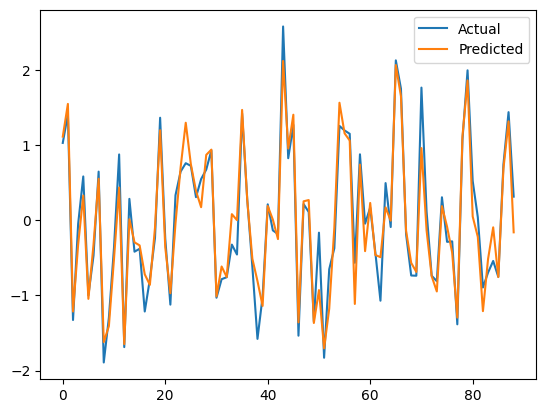

In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Predicted"]
com.plot()

DTR

In [ ]:
clf = GridSearchCV(DecisionTreeRegressor(), {


    'splitter':['best','random']
}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([0.00516143, 0.00191932]),
 'std_fit_time': array([0.00240857, 0.00013542]),
 'mean_score_time': array([0.00178638, 0.00126133]),
 'std_score_time': array([0.00050214, 0.00016901]),
 'param_splitter': masked_array(data=['best', 'random'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'splitter': 'best'}, {'splitter': 'random'}],
 'split0_test_score': array([0.76892645, 0.63450662]),
 'split1_test_score': array([0.7909073 , 0.68153802]),
 'split2_test_score': array([0.52464163, 0.59815648]),
 'split3_test_score': array([0.46760462, 0.61209391]),
 'split4_test_score': array([0.70059848, 0.51913762]),
 'mean_test_score': array([0.65053569, 0.60908653]),
 'std_test_score': array([0.1307975 , 0.05313137]),
 'rank_test_score': array([1, 2], dtype=int32)}

In [ ]:

df_dtr = pd.DataFrame(clf.cv_results_)
df_dtr


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005161,0.002409,0.001786,0.000502,best,{'splitter': 'best'},0.768926,0.790907,0.524642,0.467605,0.700598,0.650536,0.130798,1
1,0.001919,0.000135,0.001261,0.000169,random,{'splitter': 'random'},0.634507,0.681538,0.598156,0.612094,0.519138,0.609087,0.053131,2


In [ ]:
df_dtr[['param_splitter','mean_test_score']]

,param_splitter,mean_test_score
0,best,0.650536
1,random,0.609087


In [ ]:
clf.best_params_

{'splitter': 'best'}

In [ ]:
clf.best_score_

0.6505356934852682

In [ ]:
dtr=DecisionTreeRegressor()

In [ ]:
dtr.fit(xtrain, ytrain)


DecisionTreeRegressor()

In [ ]:
pred_dtr = dtr.predict(xtest)

In [ ]:
dtr.score(xtest,ytest)

0.7979672170169281

In [ ]:
mae = mean_absolute_error(ytest,pred_dtr)
mse = mean_squared_error(ytest,pred_dtr)
rmse = mean_squared_error(ytest,pred_dtr, squared = False)
r2 = r2_score(ytest,pred_dtr)

nse = calculate_nse(ytest, pred_dtr)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)

NSE coefficient: 0.7979672170169281
Mean Absolute Error: 0.315931487022472
Mean Squared Error: 0.189021013282941
r2 score: 0.7979672170169281
RMSE: 0.43476546928538495


In [ ]:
com = pd.concat([ytest, pd.Series(pred_dtr,index=xtest.index)],axis=1)
com

,spei1,0
397,1.031675,1.245381
203,1.412818,1.629633
119,-1.326358,-1.217749
331,-0.048140,-0.109246
175,0.585287,0.035234
...,...,...
306,-0.540139,0.284509
215,-0.751858,-0.865719
89,0.744681,0.875847
198,1.441525,1.029115


<Axes: >

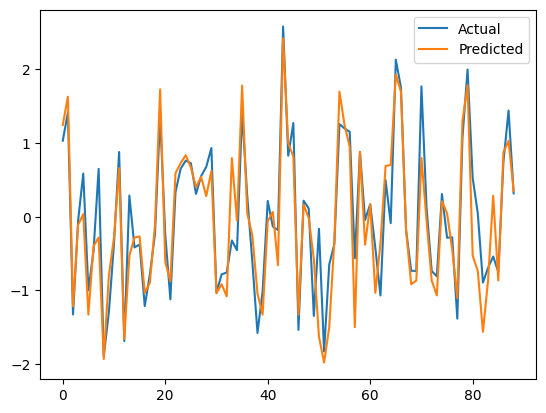

In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Predicted"]
com.plot()

XGB

In [ ]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
clf = GridSearchCV(XGBRegressor(), {
    'learning_rate': [0.05,0.1,0.5],
    'max_depth': [5,10,15,20,22],
    'n_estimators':[500,1000,2000,4000]
}, cv=5, return_train_score=False)
clf.fit(xtrain, ytrain)
clf.cv_results_

{'mean_fit_time': array([0.23737202, 0.63816581, 0.55572968, 0.89244876, 0.50746317,
        0.33438544, 0.50340548, 0.80809612, 0.27637396, 0.60050268,
        0.5058732 , 0.8403111 , 0.28654766, 0.61060596, 0.52557917,
        0.86694169, 0.52391586, 0.35908661, 0.51956944, 0.83929243,
        0.19458299, 0.50744605, 0.42441845, 0.75040226, 0.17046781,
        0.24588747, 0.64270225, 0.73143435, 0.18319778, 0.26127143,
        0.42312698, 0.98325758, 0.17916355, 0.25803156, 0.42187819,
        0.99464402, 0.17977705, 0.2663856 , 0.42543778, 0.74286203,
        0.10339231, 0.42736421, 0.34634275, 0.67352433, 0.10459948,
        0.18036489, 0.33299608, 0.90909977, 0.10486045, 0.18654294,
        0.33706698, 0.66323137, 0.10447674, 0.41917853, 0.33702617,
        0.66664963, 0.10647006, 0.18171   , 0.34792318, 0.90039611]),
 'std_fit_time': array([0.02355168, 0.48992001, 0.01872067, 0.01918734, 0.50316558,
        0.01154598, 0.01220531, 0.00492551, 0.0038582 , 0.47624121,
        0.009

In [ ]:
df_xgb = pd.DataFrame(clf.cv_results_)
df_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.237372,0.023552,0.003564,0.000189,0.05,5,500,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.891158,0.849630,0.845779,0.854556,0.832433,0.854711,0.019648,8
1,0.638166,0.489920,0.004987,0.002177,0.05,5,1000,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.891497,0.850054,0.846195,0.855139,0.832626,0.855102,0.019670,7
2,0.555730,0.018721,0.004038,0.000098,0.05,5,2000,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.891497,0.850054,0.846195,0.855139,0.832626,0.855102,0.019670,5
3,0.892449,0.019187,0.004886,0.000597,0.05,5,4000,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.891497,0.850054,0.846195,0.855139,0.832626,0.855102,0.019670,6
4,0.507463,0.503166,0.004045,0.000316,0.05,10,500,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.890940,0.832830,0.833155,0.776596,0.789373,0.824579,0.040218,24
5,0.334385,0.011546,0.004695,0.001531,0.05,10,1000,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.890940,0.832830,0.833155,0.776596,0.789373,0.824579,0.040218,23
6,0.503405,0.012205,0.004650,0.001247,0.05,10,2000,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.890940,0.832830,0.833155,0.776596,0.789373,0.824579,0.040218,22
7,0.808096,0.004926,0.005380,0.001498,0.05,10,4000,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.890940,0.832830,0.833155,0.776596,0.789373,0.824579,0.040218,21
8,0.276374,0.003858,0.004288,0.000490,0.05,15,500,"{'learning_rate': 0.05, 'max_depth': 15, 'n_es...",0.880065,0.826667,0.824335,0.774875,0.788745,0.818937,0.036547,60
9,0.600503,0.476241,0.004143,0.000070,0.05,15,1000,"{'learning_rate': 0.05, 'max_depth': 15, 'n_es...",0.880065,0.826667,0.824335,0.774875,0.788745,0.818937,0.036547,59


In [ ]:
df_xgb[['param_learning_rate','param_max_depth','param_n_estimators', 'mean_test_score']]

,param_learning_rate,param_max_depth,param_n_estimators,mean_test_score
0,0.05,5,500,0.854711
1,0.05,5,1000,0.855102
2,0.05,5,2000,0.855102
3,0.05,5,4000,0.855102
4,0.05,10,500,0.824579
5,0.05,10,1000,0.824579
6,0.05,10,2000,0.824579
7,0.05,10,4000,0.824579
8,0.05,15,500,0.818937
9,0.05,15,1000,0.818937


In [ ]:
clf.best_params_


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}

In [ ]:
clf.best_score_

0.8582312457610536

In [ ]:
xgb = XGBRegressor(
    learning_rate = 0.1,
    max_depth = 5,
    n_estimators=500
)

In [ ]:
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
pred_xgb = xgb.predict(xtest)

In [ ]:
xgb.score(xtest,ytest)

0.9203722529760048

In [ ]:
mae = mean_absolute_error(ytest,pred_xgb)
mse = mean_squared_error(ytest,pred_xgb)
rmse = mean_squared_error(ytest,pred_xgb, squared = False)
r2 = r2_score(ytest,pred_xgb)

nse = calculate_nse(ytest, pred_xgb)

print("NSE coefficient:", nse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("r2 score:", r2)
print("RMSE:", rmse)

NSE coefficient: 0.9203722529760048
Mean Absolute Error: 0.20028085031227386
Mean Squared Error: 0.07449938176208959
r2 score: 0.9203722529760048
RMSE: 0.27294574875254896


In [ ]:
com = pd.concat([ytest, pd.Series(pred_xgb,index=xtest.index)],axis=1)
com

,spei1,0
397,1.031675,1.115456
203,1.412818,1.551084
119,-1.326358,-1.213211
331,-0.048140,-0.322666
175,0.585287,0.331369
...,...,...
306,-0.540139,-0.092463
215,-0.751858,-0.754624
89,0.744681,0.687700
198,1.441525,1.318772


<Axes: >

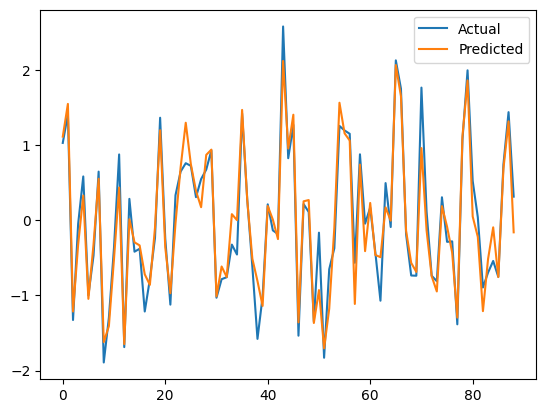

In [ ]:
com.reset_index(inplace=True)
com.drop(["index"],axis = 1, inplace = True)
com.columns = ["Actual", "Predicted"]
com.plot()

In [ ]:
model_params = {
    'svm': {
        'model':SVR(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [100, 300, 500, 1000, 2000 , 4000],
             'max_depth': [1, 2, 5, 10,15, 20, 25]
        }
    },
     'XGBRegressor': {
        'model': XGBRegressor(),
        'params' : {
            'learning_rate': [0.05,0.1,0.5],
            'max_depth': [5,10,15,20,22],
            'n_estimators':[500,1000,2000,4000]
        }
    },
    'DTR' : {
        'model': DecisionTreeRegressor(),
        'params': {
            'splitter': ['best','random']
        }
    },
    'KNN' : {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
             'weights': ['uniform','distance'],
             'leaf_size': [25,30,35,40]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(xtrain, ytrain)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df_grid = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_grid

,model,best_score,best_params
0,svm,0.373953,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.836366,"{'max_depth': 20, 'n_estimators': 1000}"
2,XGBRegressor,0.858231,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
3,DTR,0.645292,{'splitter': 'best'}
4,KNN,0.711608,"{'leaf_size': 25, 'n_neighbors': 3, 'weights':..."
